# FAKE NEWS DETECTION

Nadira Irsalina (DBA2134265)




# Classificaton with Python


# Data Understanding

## Impor package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn import tree

## Impor Dataset

In [ ]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/true.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22279 entries, 0 to 22278
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    22279 non-null  object
 1   text     22279 non-null  object
 2   subject  22279 non-null  object
 3   date     22279 non-null  object
dtypes: object(4)
memory usage: 696.3+ KB


# Data Preparation 

## Menyisipkan kolom "kelas" sebagai fitur target



FAKE NEWS DESCRIBE




In [ ]:
df_fake['title'].describe() #JUDUL BERITA FAKE

count                                                 23481
unique                                                17903
top       MEDIA IGNORES Time That Bill Clinton FIRED His...
freq                                                      6
Name: title, dtype: object

In [ ]:
df_fake['text'].describe() #JUMLAH TEXT BERITA FAKE

count     23481
unique    17455
top            
freq        626
Name: text, dtype: object

In [ ]:
df_fake['subject'].describe() #SUBJECT BERITA FAKE PALING TOP

count     23481
unique        6
top        News
freq       9050
Name: subject, dtype: object

In [ ]:
df_fake['date'].describe() #TANGGAL BERITA FAKE PALING TOP

count            23481
unique            1681
top       May 10, 2017
freq                46
Name: date, dtype: object

TRUE NEWS DESCRIBES

In [ ]:
df_true['title'].describe() #JUDUL BERITA PALING TOP

count                                                 22279
unique                                                20826
top       Factbox: Trump fills top jobs for his administ...
freq                                                     14
Name: title, dtype: object

In [ ]:
df_true['text'].describe() #TEKS BERITA PALING TOP

count                                                 22279
unique                                                21194
top       (Reuters) - Highlights for U.S. President Dona...
freq                                                      8
Name: text, dtype: object

In [ ]:
df_true['subject'].describe() #SUBJECT BERITA PALING TOP

count            22279
unique               2
top       politicsNews
freq             12134
Name: subject, dtype: object

In [ ]:
df_true['date'].describe() #TANGGAL BERITA PALING TOP

count                  22279
unique                   716
top       December 20, 2017 
freq                     182
Name: date, dtype: object

In [ ]:
df_fake.dropna(inplace=True)
df_true.dropna(inplace=True)


In [ ]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (22279, 5))

In [ ]:
# Menghapus 10 baris terakhir untuk pengujian manual
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (22269, 5))

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
22269,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
22270,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
22271,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
22272,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
22273,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
22274,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
22275,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
22276,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
22277,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
22278,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Pengolahan dan visualisasi data

In [ ]:
total_news= pd.concat([df_fake,df_true])

In [ ]:
total_news #TOTAL KESELERUHAN DATA TRUE AND FAKE

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
22274,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
22275,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
22276,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
22277,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
total_news_cop= total_news.copy() # membuat salinan untuk menjaga orisinalitas data.

In [ ]:
total_news_cop['subject'].value_counts()  # berapa banyak jumlah nomor subjek unik

politicsNews       12134
worldnews          10135
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          768
Name: subject, dtype: int64

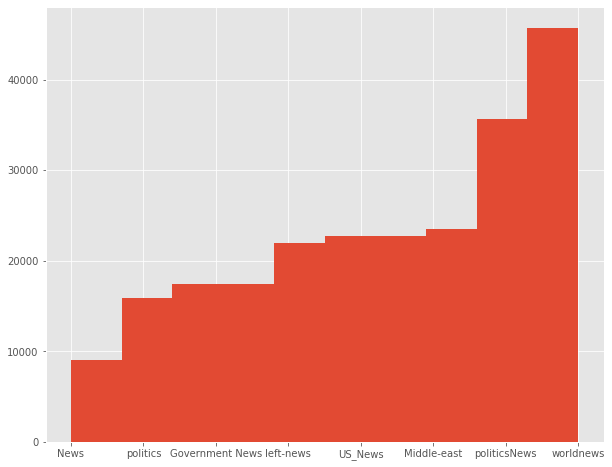

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(total_news_cop['subject'],cumulative=1,align='mid')
plt.show() # HISTOGRAM berapa banyak jumlah subjek BERITA

In [ ]:
total_news_cop['class'].value_counts() #TOTAL KELAS

0    23461
1    22259
Name: class, dtype: int64

In [ ]:
total_news_cop[(total_news_cop['date'].str.startswith('https'))] # drop start dengan https untuk membuat date_time 

,title,text,subject,date,class
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0


In [ ]:
total_news_cop.drop([9358,15507,15508,15839,15840,17432,17433,21869,21870],axis=0, inplace= True)

In [ ]:
total_news_cop[(total_news_cop['date']=="MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]")]

,title,text,subject,date,class
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0


In [ ]:
total_news_cop.drop(18933,axis=0, inplace= True)

## Konversi dari objek ke date_time dan grafik¶

In [ ]:
total_news_cop["date"]= pd.to_datetime(total_news_cop["date"])

In [ ]:
fig = px.line(total_news_cop, x="subject", y="date", color="class")
plt.figure(figsize= (10,8))
fig.show()
#GRAFIK SEBARAN BERITA DENGAN TANGGAL. KET : 0 = FAKE, 1 = TRUE

<Figure size 720x576 with 0 Axes>

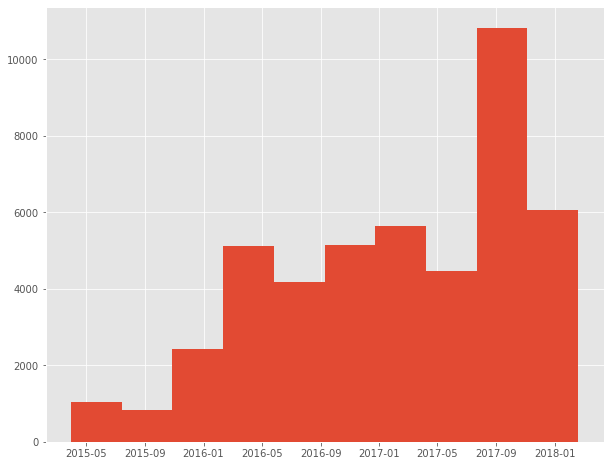

In [ ]:
plt.figure(figsize= (10,8))
plt.hist(total_news_cop['date'])

plt.show() #HISTORAM TOTAL NEWS COP

## Menggabungkan Dataframes True dan Fake





In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns #macam kolom yang ada dlm dataset

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

# Modelling Data

## Menghapus kolom yang tidak diperlukan

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1) #hapus kolom

In [ ]:
df.isnull().sum() #cek missing value

text     0
class    0
dtype: int64

## Menyeret dataframe acak

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
21451,Everything about this muslim boy s story is a ...,0
22092,US paratrooper on security duty during a miss...,0
3324,"On Tuesday night, Fox News blowhard and right-...",0
9692,Hillary Clinton today falsely called Donald Tr...,0
12089,"Glenn Beck, a man once described by Forbes as ...",0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,Everything about this muslim boy s story is a ...,0
1,US paratrooper on security duty during a miss...,0
2,"On Tuesday night, Fox News blowhard and right-...",0
3,Hillary Clinton today falsely called Donald Tr...,0
4,"Glenn Beck, a man once described by Forbes as ...",0


## Membuat fungsi untuk memproses teks

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

## Mendefinisikan variabel dependen dan independen

In [ ]:
x = df["text"] #variabel independen
y = df["class"] #variabel dependen

## Membagi Pelatihan dan Pengujian

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Konversi teks menjadi vektor

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Evaluation

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test) #logistik regresion predict

0.9872321818976826

In [ ]:
print(classification_report(y_test, pred_lr)) #clasifacation report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5839
           1       0.98      0.99      0.99      5596

    accuracy                           0.99     11435
   macro avg       0.99      0.99      0.99     11435
weighted avg       0.99      0.99      0.99     11435



## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier() #fungsi classifier decision tree
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test) #hasil prediksi decision tree

0.9959772627896808

In [ ]:
print(classification_report(y_test, pred_dt)) #klasifikasi report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5839
           1       1.00      1.00      1.00      5596

    accuracy                           1.00     11435
   macro avg       1.00      1.00      1.00     11435
weighted avg       1.00      1.00      1.00     11435



## Pengklasifikasi Peningkatan Gradien

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test) #hasil klasifikasi peningkatan gradien

0.9958023611718408

In [ ]:
print(classification_report(y_test, pred_gbc)) #klasifikasi report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5839
           1       0.99      1.00      1.00      5596

    accuracy                           1.00     11435
   macro avg       1.00      1.00      1.00     11435
weighted avg       1.00      1.00      1.00     11435



## Pengklasifikasi Acak

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train) #pengujian klasifikasi acak

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test) 

In [ ]:
RFC.score(xv_test, y_test) #hasil klasifikasi acak

0.9892435505028422

In [ ]:
print(classification_report(y_test, pred_rfc)) #klasifikasi report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5839
           1       0.99      0.99      0.99      5596

    accuracy                           0.99     11435
   macro avg       0.99      0.99      0.99     11435
weighted avg       0.99      0.99      0.99     11435



# Deployment

## Model Testing

In [ ]:
def output_lable(n):   #fungsi pemodelan untuk mendeteksi berita fake atau bukan
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input()) ##JIKA KAMU MENULIS TEKS BERITA MAKA AKAN TERDETEKSI FAKE APA BUKAN
manual_testing(news) #KOLOM INPUT AKAN MUNCUL BILA DIRUNNING dan MENUNJUKKAN BUKAN BERITA FAKE

 WARSAW (Reuters) - Poland has asked the European Commission to withdraw its legal proceedings against Warsaw over its migrant relocation quotas and said it was ready to fight its case in court, the foreign ministry said on Wednesday.  In July the Commission sent so-called  reasoned opinions  to Poland, Czech Republic and Hungary urging them to apply EU migration rules.  Poland has sent a motion to the European Commission requesting it to discontinue its ongoing infringement procedure. Should it be continued, Poland is prepared to argue its case before the Court of Justice of the European Union , the ministry said in a statement.  Poland s ruling Law and Justice party (PiS) has repeatedly criticized the EU s relocation scheme for each member state to host a given number of migrants to help ease pressure on Greece and Italy, struggling with mass arrivals of migrants across the Mediterranean. Earlier on Wednesday, Interior Minister Mariusz Blaszczak said in a statement that the EU s relo

In [ ]:
news = str(input()) ##JIKA KAMU MENULIS TEKS BERITA MAKA AKAN TERDETEKSI FAKE APA BUKAN
manual_testing(news) # DIBAWAH INI MENUJUKKAN BERITA FAKE

21st Century Wire says So far, after nearly 20 days of protests near Burns, Oregon, there s been no one hurt or injured, but it seems the state s chief executive is keen to change that result.According to reports today, Oregon Governor Kate Brown told a news conference hat federal officials,  must move quickly to end the occupation and hold all of the wrongdoers accountable. The governor does not appear at all concerned with the Hammond family s plight, nor with any of this story s core issues like legal minimum sentencing, jury nullification, or private, state and federal land rights   and yet, seems to want an armed confrontation in her state   and not with any of her own state or county law enforcement agents, but by using federal agents instead. PLEADING TO FEDS: Oregon governor Kate Brown.She added,  Residents of Harney County have been overlooked and underserved by federal officials  response thus far. I have conveyed these very grave concerns directly to our leaders at the highe

pembuat all coding : NADIRA IRSALINA

data referensi : https://www.kaggle.com/code/kadircalkan/fake-news-detection-machine-learning
